<a href="https://colab.research.google.com/github/NMNayan57/2D-house/blob/main/PHD(Mobarak_sir).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Relevant Libraries Import 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/prenancy.csv')

In [ ]:
df.head(10)

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,22,98.8,70,121,80,18.8,39,5.6,low risk
1,34,98.8,70,141,80,18.8,36,5.8,mid risk
2,20,98.8,70,120,80,18.8,32,5.8,low risk
3,24,98.8,70,141,80,18.8,40,5.9,mid risk
4,22,98.8,70,120,80,18.8,38,5.6,low risk
5,20,98.8,70,121,80,18.8,30,5.6,low risk
6,31,98.8,68,143,91,22.5,42,6.0,mid risk
7,17,98.6,91,139,101,21.0,42,6.0,high risk
8,22,98.8,70,162,80,18.8,30,5.8,high risk
9,20,98.8,70,99,80,18.8,31,5.7,high risk


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2105 non-null   int64  
 1   Body Temperature(F)                2105 non-null   float64
 2   Heart rate(bpm)                    2105 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     2105 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    2105 non-null   int64  
 5   BMI(kg/m 2)                        2105 non-null   float64
 6   Blood Glucose(HbA1c)               2105 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  2105 non-null   float64
 8   Outcome                            2105 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 148.1+ KB


In [ ]:
df.isnull().sum()

Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

high risk    717
low risk     697
mid risk     691
Name: Outcome, dtype: int64

In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 0 duplicates data


,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome


In [ ]:
df.Outcome= le.fit_transform(df.Outcome.values)
df['Outcome'].value_counts()

0    717
1    697
2    691
Name: Outcome, dtype: int64

In [ ]:
df.describe()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
count,2105.000000,2105.000000,2105.00000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,24.041330,98.784656,74.60190,131.918290,82.724941,19.577862,37.487411,5.839382,0.987648
std,6.928389,1.393970,12.81872,19.221121,5.728396,1.733175,4.481580,0.274576,0.817954
min,15.000000,39.600000,45.00000,90.000000,60.000000,16.500000,30.000000,4.000000,0.000000
25%,21.000000,98.800000,70.00000,120.000000,80.000000,18.800000,34.000000,5.700000,0.000000
50%,22.000000,98.800000,70.00000,129.000000,80.000000,18.800000,38.000000,5.800000,1.000000
75%,25.000000,98.800000,75.00000,142.000000,85.000000,19.200000,41.000000,5.900000,2.000000
max,250.000000,102.000000,147.00000,168.000000,107.000000,27.800000,50.000000,7.000000,2.000000


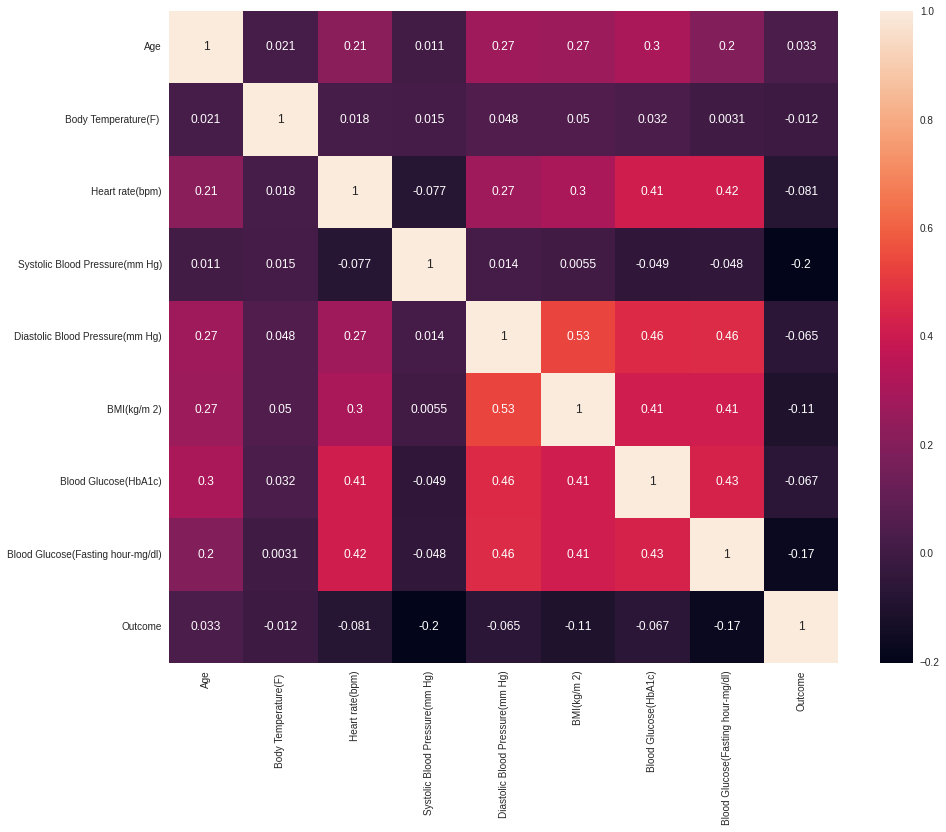

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from featurewiz import featurewiz


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (2105, 9)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  #

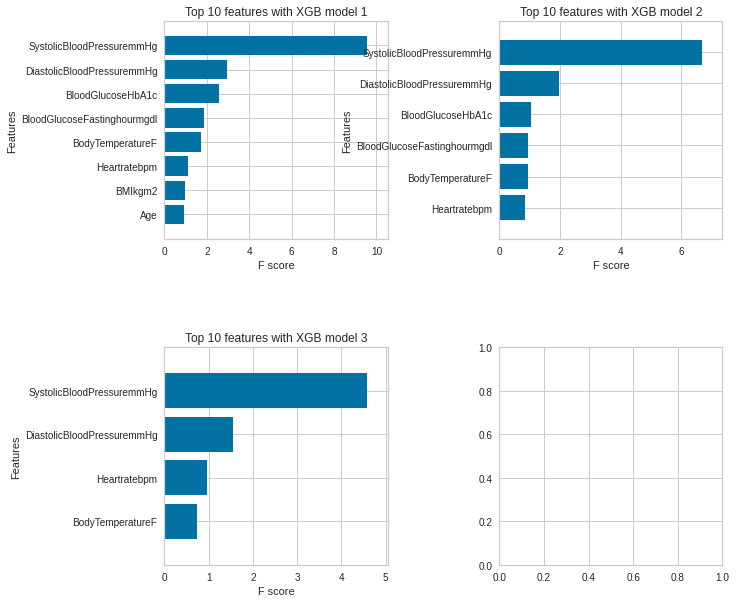

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 3 important features:
['SystolicBloodPressuremmHg', 'DiastolicBloodPressuremmHg', 'BloodGlucoseHbA1c']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 3 important features and a train dataframe


In [ ]:
target = 'Outcome'
 
features= featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
print(features)


(['Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 'Blood Glucose(HbA1c)'],       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                121                               80   
1                                141                               80   
2                                120                               80   
3                                141                               80   
4                                120                               80   
...                              ...                              ...   
2100                             128                               85   
2101                             142                               80   
2102                             161                               80   
2103                             121                               80   
2104                             142                               80   

      Blood Glucose(HbA1c) 

In [ ]:
X = df.drop( 'Outcome', axis=1)
y = df['Outcome']

In [ ]:
X.shape


(2105, 8)

In [ ]:
y.shape

(2105,)

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1684, 8)
Number transactions y_train dataset:  (1684,)
Number transactions X_test dataset:  (421, 8)
Number transactions y_test dataset:  (421,)


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       1.00      0.99      0.99       139
           2       0.96      0.99      0.97       138

    accuracy                           0.98       421
   macro avg       0.98      0.98      0.98       421
weighted avg       0.98      0.98      0.98       421

mse= 0.06175771971496437
msle= 0.018732894851987782
mae= 0.0332541567695962
rmse= 0.24851100521901312


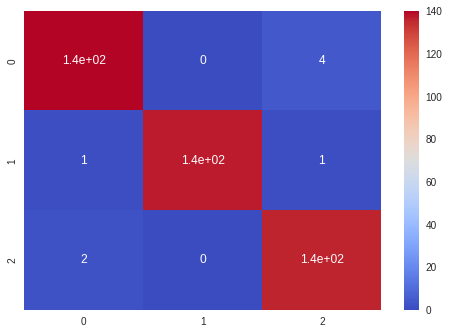

,class,sensitivity,specificity
0,0,0.996390,0.979167
1,1,0.985816,1.000000
2,2,0.989399,0.963768


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))



labels = np.unique(predictions)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()


pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.93      1.00      0.97       139
           2       0.98      0.91      0.95       138

    accuracy                           0.96       421
   macro avg       0.96      0.96      0.96       421
weighted avg       0.96      0.96      0.96       421

mse= 0.09026128266033254
msle= 0.026225214833004353
mae= 0.057007125890736345
rmse= 0.30043515550003885


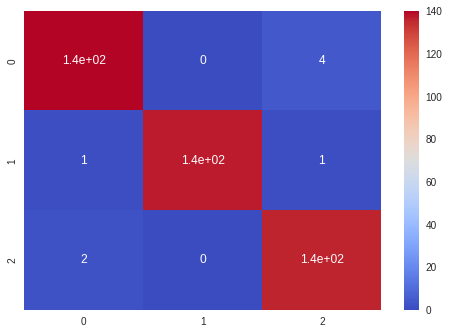

,class,sensitivity,specificity
0,0,0.996390,0.979167
1,1,0.985816,1.000000
2,2,0.989399,0.963768


In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions1 = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


labels = np.unique(predictions)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()


pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       144
           1       1.00      0.99      1.00       139
           2       0.98      0.99      0.98       138

    accuracy                           0.99       421
   macro avg       0.99      0.99      0.99       421
weighted avg       0.99      0.99      0.99       421

mse= 0.0498812351543943
msle= 0.015475529258862494
mae= 0.026128266033254157
rmse= 0.22334107359461292


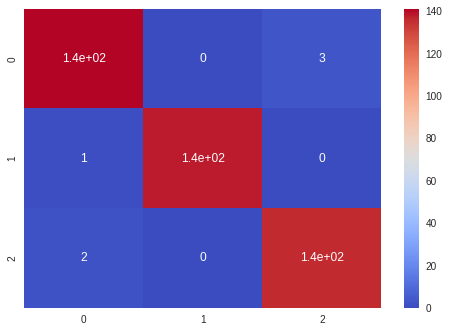

,class,sensitivity,specificity
0,0,0.996390,0.979167
1,1,0.985816,1.000000
2,2,0.989399,0.963768


In [ ]:

XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))



labels = np.unique(predictions)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       144
           1       0.85      0.99      0.91       139
           2       0.90      0.64      0.75       138

    accuracy                           0.84       421
   macro avg       0.85      0.84      0.84       421
weighted avg       0.85      0.84      0.84       421

mse= 0.4346793349168646
msle= 0.12760622243938577
mae= 0.2494061757719715
rmse= 0.6593021575248064


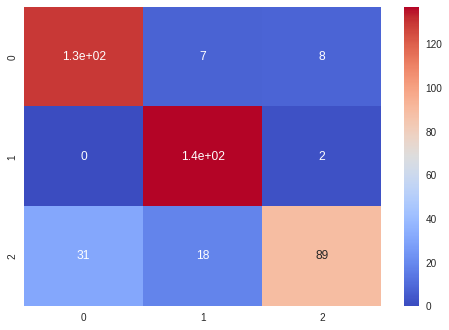

,class,sensitivity,specificity
0,0,0.996390,0.979167
1,1,0.985816,1.000000
2,2,0.989399,0.963768


In [ ]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())
  
predictions = MLP.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

labels = np.unique(predictions)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()


pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       144
           1       1.00      0.96      0.98       139
           2       0.93      0.93      0.93       138

    accuracy                           0.95       421
   macro avg       0.95      0.95      0.95       421
weighted avg       0.95      0.95      0.95       421

mse= 0.16389548693586697
msle= 0.04932374171619288
mae= 0.08788598574821853
rmse= 0.4048400757532127


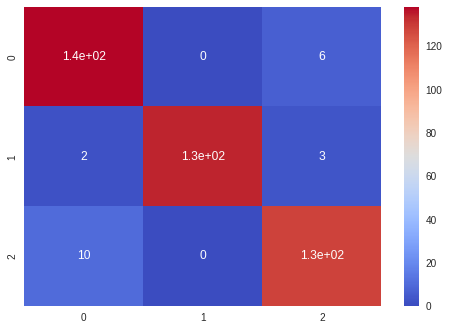

,class,sensitivity,specificity
0,0,0.996390,0.979167
1,1,0.985816,1.000000
2,2,0.989399,0.963768


In [ ]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())
  
predictions = adaboost.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

labels = np.unique(predictions)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()


pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       144
           1       0.97      1.00      0.99       139
           2       0.98      0.96      0.97       138

    accuracy                           0.98       421
   macro avg       0.98      0.98      0.98       421
weighted avg       0.98      0.98      0.98       421

mse= 0.047505938242280284
msle= 0.013029462372501159
mae= 0.028503562945368172
rmse= 0.21795857001338645


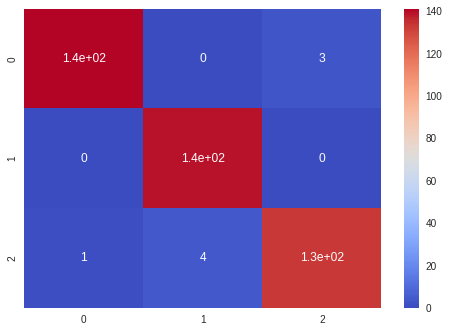

,class,sensitivity,specificity
0,0,0.996390,0.979167
1,1,0.985816,1.000000
2,2,0.989399,0.963768


In [ ]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=10, random_state=100)
# train the model on train set
RF.fit(X_train, y_train.ravel())
  
predictions = RF.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

labels = np.unique(predictions)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()


pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

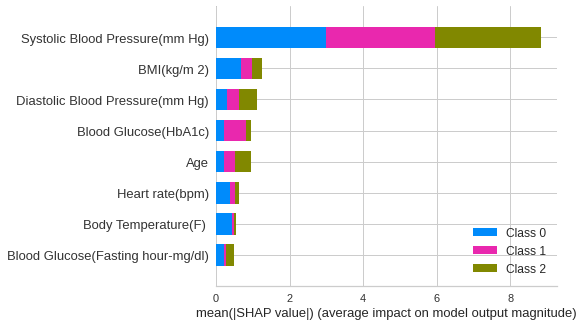

In [ ]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X,
    class_names=['0', '1', '2'],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=XGB.predict_proba
)

exp.show_in_notebook(show_table=True)

Accuracy= 0.9809976247030879
precision= 0.9809976247030879
recall= 0.9809976247030879
f1= 0.9809976247030879


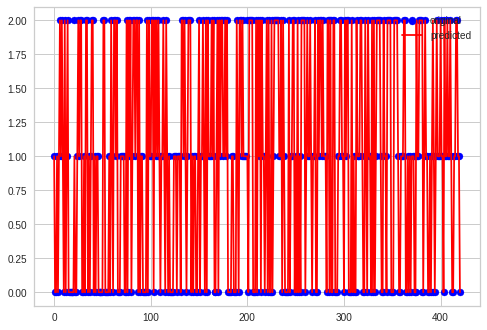

In [ ]:
Accuracy=accuracy_score(y_test,  predictions)
precision=precision_score(y_test, predictions,average='micro')
recall=recall_score(y_test, predictions,average='micro')
f1=f1_score(y_test, predictions,average='micro')
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)





y = y_test
yhat = predictions
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 



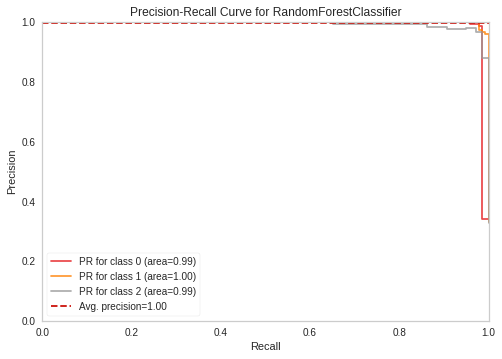

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()